In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uszipcode import SearchEngine, SimpleZipcode
import plotly.graph_objects as go


In [90]:
filepath = '/Users/rickypang/Desktop/Project-2-Linkedin-Analysis/data/job_postings.csv'
df=pd.read_csv(filepath)

#convert date columns to date time
df['listed_time'] = pd.to_datetime(df['listed_time'], unit='ms')
df['original_listed_time'] = pd.to_datetime(df['original_listed_time'], unit='ms')
df['expiry']=pd.to_datetime(df['expiry'],unit='ms')

#convert company ID to an int, convert NaN to NaN
df['company_id'] = pd.to_numeric(df['company_id'], errors='coerce').astype('Int64')

#Pre-process and convert NaNs in company ID to -1
df['company_id'] = df['company_id'].fillna(-1)

#display df
pd.set_option('display.max_columns',None)
df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,2023-11-04 09:26:40,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,2023-12-04 08:53:20,NaN,Entry level,NaN,2023-11-04 09:26:40,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,2023-11-04 06:40:00,NaN,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,OffsiteApply,2023-12-04 08:53:20,NaN,NaN,NaN,2023-11-04 06:40:00,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,2023-11-04 06:40:00,NaN,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,OffsiteApply,2023-12-04 08:53:20,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,2023-11-04 06:40:00,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,2023-11-04 06:40:00,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,2023-12-04 08:53:20,NaN,Entry level,NaN,2023-11-04 06:40:00,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,2023-11-03 00:06:40,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,2023-12-04 08:53:20,NaN,Mid-Senior level,NaN,2023-11-04 09:26:40,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,2023-08-23 22:33:20,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,2023-09-23 00:46:40,NaN,NaN,NaN,2023-08-23 22:33:20,NaN,0,FULL_TIME,NaN,NaN,1
33242,108965123,-1,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",2.0,2023-11-03 19:33:20,NaN,4.0,https://www.linkedin.com/jobs/view/108965123/?...,NaN,ComplexOnsiteApply,2023-12-03 19:00:00,NaN,NaN,NaN,2023-11-03 19:33:20,NaN,0,FULL_TIME,NaN,NaN,1699044401
33243,102339515,52132271,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,NaN,2023-11-03 22:20:00,NaN,NaN,https://www.linkedin.com/jobs/view/102339515/?...,NaN,SimpleOnsiteApply,2023-12-03 21:46:40,NaN,NaN,NaN,2023-11-03 22:20:00,NaN,0,FULL_TIME,NaN,NaN,1699063495
33244,85008768,-1,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,2023-08-23 00:20:00,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,2024-02-18 23:46:40,NaN,NaN,NaN,2023-08-23 00:20:00,NaN,1,FULL_TIME,USD,BASE_SALARY,1


In [91]:
df.isnull().sum()
#drop columns..
#closed time
#application url
#posting domain
#skills_desc (but add other dataset)
#clean industry column in the other dataset
#drop original listed time
df = df.drop(['closed_time', 'application_url', 'posting_domain', 'skills_desc', 'original_listed_time',], axis=1)




In [92]:

#other clean up
#location - some remote jobs list location as United States
#some list countries instead of cities
#look over remote allowed column - does null mean that remote is not allowed?
#go through job posting workflow 
#some cities are listed as san francisco bay area - this should include san mateo / sunnyvale?
#some jobs are listed in multiple cities for one actual job - how to deal with this?
#we dont know how accurate the views are because the views are a snapshot taken when the scrape was done (we dont know when the listing time was)
#job title standardization 

# Extracting city, state, and country
df[['City', 'State', 'Country']] = df['location'].str.extract(r'([^,]+)?,?\s?([^,]+)?,?\s?([^\d]+)?')

# Filling missing values in 'Country' with 'United States' if the state is present
df['Country'].fillna('United States', inplace=True)
df[['City', 'State', 'Country']]


,City,State,Country
0,Little River,SC,United States
1,Beaver Dam,WI,United States
2,Bessemer,AL,United States
3,Aliso Viejo,CA,United States
4,United States,NaN,United States
...,...,...,...
33241,Santa Clarita,CA,United States
33242,New York,NY,United States
33243,Greater Boston,NaN,United States
33244,Chico,CA,United States


In [93]:
df_sorted = df.sort_values(by='max_salary', ascending=False)
df_sorted

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,remote_allowed,views,job_posting_url,application_type,expiry,formatted_experience_level,listed_time,sponsored,work_type,currency,compensation_type,scraped,City,State,Country
27035,3694103424,92699700,Quantitative Developer,Goliath Partners has a requirement at a leadin...,1300000.0,NaN,800000.0,YEARLY,Full-time,Greater Chicago Area,14.0,NaN,49.0,https://www.linkedin.com/jobs/view/3694103424/...,ComplexOnsiteApply,2023-09-23 00:46:40,Mid-Senior level,2023-08-24 01:20:00,0,FULL_TIME,USD,BASE_SALARY,1,Greater Chicago Area,NaN,United States
17561,3701369748,106584,Fintech Startup | Tech Lead Manager - Software...,Tech Lead / Manager | Software EngineerSelby J...,1100000.0,NaN,500000.0,YEARLY,Full-time,United States,NaN,1.0,368.0,https://www.linkedin.com/jobs/view/3701369748/...,ComplexOnsiteApply,2023-09-21 21:00:00,Mid-Senior level,2023-08-22 21:33:20,0,FULL_TIME,USD,BASE_SALARY,1,United States,NaN,United States
18120,3701326157,106584,Tech Lead Manager (L6-L8) | Disruptive FinTech,Tech Lead Manager (L6-L8) | Disruptive FinTech...,1000000.0,NaN,750000.0,YEARLY,Full-time,"Palo Alto, CA",48.0,1.0,166.0,https://www.linkedin.com/jobs/view/3701326157/...,ComplexOnsiteApply,2023-12-20 19:20:00,Mid-Senior level,2023-08-23 22:33:20,1,FULL_TIME,USD,BASE_SALARY,1,Palo Alto,CA,United States
12010,3755585686,3560734,Life Science Consulting Partner,We set out to develop a health care innovation...,900000.0,NaN,400000.0,YEARLY,Full-time,"New York, NY",19.0,1.0,116.0,https://www.linkedin.com/jobs/view/3755585686/...,ComplexOnsiteApply,2023-12-03 21:46:40,Mid-Senior level,2023-11-03 19:33:20,0,FULL_TIME,USD,BASE_SALARY,1699059350,New York,NY,United States
30821,3693052192,-1,Urologist,Here are the Details: Location: DC/Baltimore ...,800000.0,NaN,600000.0,YEARLY,Full-time,"Baltimore, MD",NaN,NaN,6.0,https://www.linkedin.com/jobs/view/3693052192/...,ComplexOnsiteApply,2023-09-21 21:00:00,NaN,2023-08-22 21:33:20,0,FULL_TIME,USD,BASE_SALARY,1,Baltimore,MD,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33239,218881389,-1,Accounting Associate,My client a local office is seeking an Account...,NaN,NaN,NaN,NaN,Full-time,"Bolingbrook, IL",1.0,NaN,2.0,https://www.linkedin.com/jobs/view/218881389/?...,ComplexOnsiteApply,2023-12-03 21:46:40,NaN,2023-11-03 22:20:00,0,FULL_TIME,NaN,NaN,1699084455,Bolingbrook,IL,United States
33240,133196985,1089558,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",1.0,NaN,17.0,https://www.linkedin.com/jobs/view/133196985/?...,ComplexOnsiteApply,2023-09-21 18:13:20,NaN,2023-08-22 18:46:40,0,CONTRACT,NaN,NaN,1,New York,NY,United States
33241,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,ComplexOnsiteApply,2023-09-23 00:46:40,NaN,2023-08-23 22:33:20,0,FULL_TIME,NaN,NaN,1,Santa Clarita,CA,United States
33242,108965123,-1,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",2.0,NaN,4.0,https://www.linkedin.com/jobs/view/108965123/?...,ComplexOnsiteApply,2023-12-03 19:00:00,NaN,2023-11-03 19:33:20,0,FULL_TIME,NaN,NaN,1699044401,New York,NY,United States


In [94]:
# Identify duplicates based on 'company_id' and 'title'
duplicates_mask = df.duplicated(subset=['company_id', 'title'], keep=False)

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = df[duplicates_mask]

# Display the duplicate rows - these rows signify listings that are the same title and same company - we have opted to leave these in the dataset
duplicate_rows

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,remote_allowed,views,job_posting_url,application_type,expiry,formatted_experience_level,listed_time,sponsored,work_type,currency,compensation_type,scraped,City,State,Country
3,3757938018,18213359,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,OffsiteApply,2023-12-04 08:53:20,Entry level,2023-11-04 06:40:00,0,FULL_TIME,USD,BASE_SALARY,1699087461,Aliso Viejo,CA,United States
4,3757937095,437225,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,OffsiteApply,2023-12-04 08:53:20,Mid-Senior level,2023-11-04 09:26:40,0,FULL_TIME,USD,BASE_SALARY,1699085346,United States,NaN,United States
8,3757936097,18213359,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",NaN,19.30,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3757936097/...,OffsiteApply,2023-12-04 08:53:20,Entry level,2023-11-04 06:40:00,0,FULL_TIME,USD,BASE_SALARY,1699089324,Aliso Viejo,CA,United States
14,3757935025,99500291,Associate Veterinarian,We are looking to hire an Associate Veterinari...,NaN,NaN,NaN,NaN,Full-time,"St Clair Shores, Michigan, United States",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3757935025/...,OffsiteApply,2023-12-04 06:06:40,Mid-Senior level,2023-11-04 06:40:00,0,FULL_TIME,NaN,NaN,1699131931,St Clair Shores,Michigan,United States
16,3757935011,82556159,Remote Vacation Planner,Full Job Description\n\nWe are focused on prov...,NaN,NaN,NaN,NaN,Full-time,"Raleigh, NC",NaN,1.0,NaN,https://www.linkedin.com/jobs/view/3757935011/...,OffsiteApply,2023-12-04 06:06:40,Entry level,2023-11-04 06:40:00,0,FULL_TIME,NaN,NaN,1699084233,Raleigh,NC,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33219,2148434019,1016,"Virtual Sales Associate Account Manager, Women...",Job Description Summary \n\nAs the Virtual Sal...,NaN,NaN,NaN,NaN,Full-time,"Connecticut, United States",NaN,1.0,NaN,https://www.linkedin.com/jobs/view/2148434019/...,OffsiteApply,2023-09-23 03:33:20,Entry level,2023-08-24 04:06:40,0,FULL_TIME,NaN,NaN,1,Connecticut,United States,United States
33220,2148434014,1016,"Virtual Sales Associate Account Manager, Women...",Job Description Summary \n\nAs the Virtual Sal...,NaN,NaN,NaN,NaN,Full-time,"Maine, United States",NaN,1.0,NaN,https://www.linkedin.com/jobs/view/2148434014/...,OffsiteApply,2023-09-23 03:33:20,Entry level,2023-08-24 04:06:40,0,FULL_TIME,NaN,NaN,1,Maine,United States,United States
33227,1535492735,-1,Administrative Assistant,We are looking for a responsible Administrativ...,20.0,NaN,18.0,HOURLY,Part-time,"Ocoee, FL",3.0,NaN,5.0,https://www.linkedin.com/jobs/view/1535492735/...,ComplexOnsiteApply,2024-02-18 21:00:00,NaN,2023-08-22 21:33:20,0,PART_TIME,USD,BASE_SALARY,1,Ocoee,FL,United States
33229,1483357774,-1,Video Editor,POSITION: Lead EditorREPORTS TO: Founder and D...,NaN,NaN,NaN,NaN,Full-time,"Louisville, KY",7.0,NaN,40.0,https://www.linkedin.com/jobs/view/1483357774/...,ComplexOnsiteApply,2023-09-21 18:13:20,NaN,2023-08-22 18:46:40,0,FULL_TIME,NaN,NaN,1,Louisville,KY,United States


/var/folders/5n/f53vsb0n34q3sstd084mv7g80000gn/T/ipykernel_39474/3928678452.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=df.corr()
/var/folders/5n/f53vsb0n34q3sstd084mv7g80000gn/T/ipykernel_39474/3928678452.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.ones_like(c, dtype=np.bool)


<Axes: >

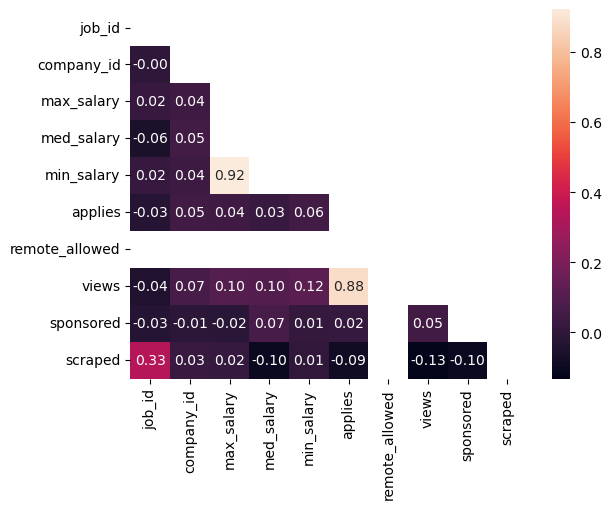

In [95]:
c=df.corr()
mask=np.ones_like(c, dtype=np.bool)
mask=np.triu(mask)
sns.heatmap(c, annot=True, fmt=".2f", annot_kws={"size": 10},mask=mask)

In [96]:
filepathforcompany = '/Users/rickypang/Desktop/Project-2-Linkedin-Analysis/data/company_details/companies.csv'
filepathforjob = '~/Downloads/data-for-project-2/job_details/job_industries.csv'
filepathforindustry = '~/Downloads/data-for-project-2/maps/industries.csv'

df2 = pd.read_csv(filepathforcompany)

df3=pd.read_csv(filepathforjob)
df4=pd.read_csv(filepathforindustry)
df4

,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"
...,...,...
224,3240,Renewable Energy Power Generation
225,3241,Renewable Energy Equipment Manufacturing
226,3242,Engineering Services
227,3243,Services for Renewable Energy


In [97]:
#left join df with company info on company_id
result_df = pd.merge(df, df2, on='company_id', how='left')
result_df=pd.merge(result_df,df3, on='job_id',how='left')
result_df=pd.merge(result_df,df4, on='industry_id',how='left')

#replace the -1s with NaN in company_id
result_df['company_id'] = result_df['company_id'].replace(-1, np.nan)

#show the new df - remote allowed and missing location
filtered_rows = result_df[(result_df['remote_allowed'] == 1.0) & result_df['zip_code'].isna()]
filtered_rows


,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,remote_allowed,views,job_posting_url,application_type,expiry,formatted_experience_level,listed_time,sponsored,work_type,currency,compensation_type,scraped,City,State,Country,name,description_y,company_size,state,country,city,zip_code,address,url,industry_id,industry_name
671,3757908631,<NA>,Structural/Miscellaneous Detailer,Company DescriptionWe suggest you enter detail...,NaN,NaN,NaN,NaN,Full-time,United States,6.0,1.0,12.0,https://www.linkedin.com/jobs/view/3757908631/...,ComplexOnsiteApply,2023-12-04 06:06:40,NaN,2023-11-04 03:53:20,0,FULL_TIME,NaN,NaN,1699083269,United States,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1555,3757752019,<NA>,Customer Service Representative,Star City Staffing was founded in 2020 with a ...,NaN,NaN,NaN,NaN,Full-time,United States,20.0,1.0,58.0,https://www.linkedin.com/jobs/view/3757752019/...,ComplexOnsiteApply,2023-12-04 00:33:20,NaN,2023-11-04 01:06:40,0,FULL_TIME,NaN,NaN,1699082602,United States,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,3757751157,<NA>,Real Estate Agent,Help Wanted: Real Estate Agents\n\nAre you a m...,NaN,NaN,NaN,NaN,Contract,United States,3.0,1.0,43.0,https://www.linkedin.com/jobs/view/3757751157/...,SimpleOnsiteApply,2023-12-04 00:33:20,NaN,2023-11-04 01:06:40,0,CONTRACT,NaN,NaN,1699135161,United States,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1681,3757749881,<NA>,UI/UX Designer,We are seeking a talented UI/UX Designer to jo...,NaN,NaN,NaN,NaN,Full-time,"Louisiana, United States",162.0,1.0,298.0,https://www.linkedin.com/jobs/view/3757749881/...,ComplexOnsiteApply,2024-05-02 00:33:20,NaN,2023-11-04 01:06:40,0,FULL_TIME,NaN,NaN,1699080458,Louisiana,United States,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,3757748411,<NA>,Personal Assistant to Chief Executive Officer,Position Overview:\nAs a remote personal assis...,NaN,NaN,NaN,NaN,Full-time,United States,209.0,1.0,519.0,https://www.linkedin.com/jobs/view/3757748411/...,ComplexOnsiteApply,2024-05-02 00:33:20,NaN,2023-11-04 01:06:40,1,FULL_TIME,NaN,NaN,1699080680,United States,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43233,3691797973,145145,Sales Specialist,Looking for a Business development specialist ...,NaN,NaN,NaN,NaN,Full-time,United States,NaN,1.0,9.0,https://www.linkedin.com/jobs/view/3691797973/...,ComplexOnsiteApply,2023-09-20 20:00:00,Executive,2023-08-21 17:46:40,0,FULL_TIME,NaN,NaN,1,United States,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,Pharmaceutical Manufacturing
43238,3691795980,7573454,Data Engineer,"Job Description:\n• Design, develop, and launc...",NaN,NaN,NaN,NaN,Contract,United States,55.0,1.0,101.0,https://www.linkedin.com/jobs/view/3691795980/...,ComplexOnsiteApply,2023-09-20 20:00:00,NaN,2023-08-21 17:46:40,0,CONTRACT,NaN,NaN,1,United States,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,IT Services and IT Consulting
43330,3690697852,<NA>,Manufacturers' Outside Sales Representative,DH Sales Company is a growing Manufacturers’ R...,NaN,NaN,NaN,NaN,Full-time,"Charlotte, NC",90.0,1.0,430.0,https://www.linkedin.com/jobs/view/3690697852/...,ComplexOnsiteApply,2024-02-06 17:20:00,NaN,2023-08-10 17:53:20,1,FULL_TIME,NaN,NaN,1,Charlotte,NC,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43448,3644195109,<NA>,Call Center Representative,This is a 1099 position. Pay is based off of t...,NaN,NaN,NaN,NaN,Full-time,Atlanta Metropolitan Area,1.0,1.0,2.0,https://www.linkedin.com/jobs/view/3644195109/...,ComplexOnsiteApply,2023-09-22 22:00:00,NaN,2023-08-23 22:33:20,0,FULL_TIME,NaN,NaN,1,Atlanta Metropolitan Area,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
result_df['currency'].unique()

array(['USD', nan], dtype=object)

In [115]:
# Create a function to fetch city, state, median home value, and median household income information
def get_zipcode_info(zipcode):
    search = SearchEngine()
    result = search.by_zipcode(zipcode)
    
    if result:
        return result.major_city, result.state, result.median_home_value, result.median_household_income, result.state_abbr
    else:
        return None, None, None, None, None

# Apply the function to create new columns
result_df[['major_city', 'state', 'median_home_value', 'median_household_income', 'state_abbr']] = result_df['zip_code'].apply(lambda x: pd.Series(get_zipcode_info(x)))

In [123]:
result_df['state_match'] = result_df['state'] == result_df['state_abbr']

# Filter the DataFrame to show only rows where there is a mismatch
mismatch_df = result_df[result_df['state_match'] == False]

# Display the DataFrame with mismatches
len(mismatch_df)

8190

In [121]:

# Assuming `result_df` is your DataFrame with state salary data
fig = go.Figure(data=go.Choropleth(
    locations=result_df['state_abbr'],
    z=result_df['med_salary'],
    locationmode='USA-states',
    colorscale='Viridis',  # You can choose a different colorscale
    zmin=result_df['med_salary'].min(),  # Set the minimum value of the color scale
    zmax=400000,  # Set the maximum value of the color scale
    colorbar=dict(
        title='Median Salary',
        tickprefix='$',  # Add a dollar sign as a prefix to colorbar ticks
        ticks='outside',  # Place colorbar ticks outside the colorbar
        ticklen=5,  # Set the length of the tick marks
        tickmode='array',  # Set the tick mode to 'array' for custom ticks
        tickvals=[10000, 50000, 100000],  # Customize the colorbar tick values
    )
))

fig.update_layout(
    title_text='LinkedIn Salaries by State',
    geo=dict(
        showlakes=True,
        projection=go.layout.geo.Projection(type='albers usa'),
        scope='usa'
    )
)

# Don't forget to call show() to display the figure
fig.show()

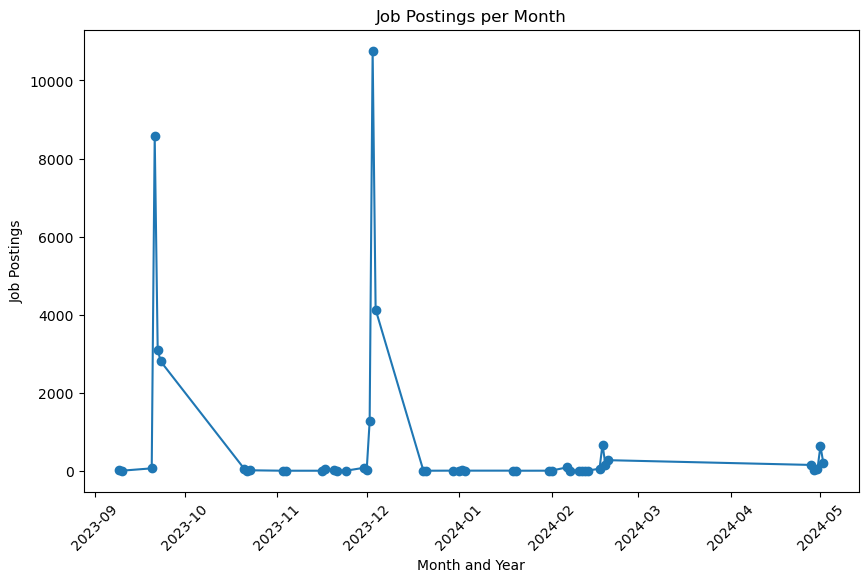

In [24]:
result_df['month_year'] = result_df['expiry'].dt.to_period('D')
monthly_counts = result_df['month_year'].value_counts().sort_index()
monthly_counts_df = pd.DataFrame({'month_year': monthly_counts.index, 'count': monthly_counts.values})
monthly_counts_df = monthly_counts_df.sort_values(by='month_year')
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts_df['month_year'].dt.to_timestamp(), monthly_counts_df['count'], marker='o', linestyle='-')
plt.title('Job Postings per Month')
plt.xlabel('Month and Year')
plt.ylabel('Job Postings')
plt.xticks(rotation=45)
plt.show()

In [7]:
#This cell looks at record count for job titles and attempts to clean

result_df['Title_Count'] = result_df.groupby('title')['title'].transform('count')

title_result_df_sorted = result_df.sort_values(by='Title_Count', ascending=False)

# Filter rows for City Lifestyle postings
filtered_result_df = title_result_df_sorted[title_result_df_sorted['url'] != 'https://www.linkedin.com/company/citylifestyle']

# Display the filtered DataFrame
print(filtered_result_df)


           job_id  company_id  \
31390  3693049649     6591488   
20609  3700550327    73013724   
179    3757919585    73013724   
16239  3749347137      444704   
158    3757921570    73013724   
...           ...         ...   
13698  3754508188       53193   
13697  3754508213        5471   
13695  3754508225     1258341   
13694  3754508252        5107   
33245     3958427      630152   

                                                   title  \
31390                                      Sales Manager   
20609                                      Sales Manager   
179                                        Sales Manager   
16239                                      Sales Manager   
158                                        Sales Manager   
...                                                  ...   
13698                      Inventory Control Team Leader   
13697  Reliability Maintenance Engineering Internship...   
13695  Fusion Global Academy Virtual Teacher/Mentor -...   
136

In [8]:
df['title'].value_counts()


Sales Director [Owner/Operator]                    120
Sales Manager                                       99
Project Manager                                     97
Customer Service Representative                     85
Senior Accountant                                   83
                                                  ... 
Client Business Executive - SLED                     1
Individual Giving Officer                            1
1 pm to 5 pm Cashier                                 1
Sales Representative, Ambulatory Surgery Center      1
Stylist/ Clorist                                     1
Name: title, Length: 22404, dtype: int64

Text(0.5, 1.0, 'Most in-demand jobs posted on LinkedIn')

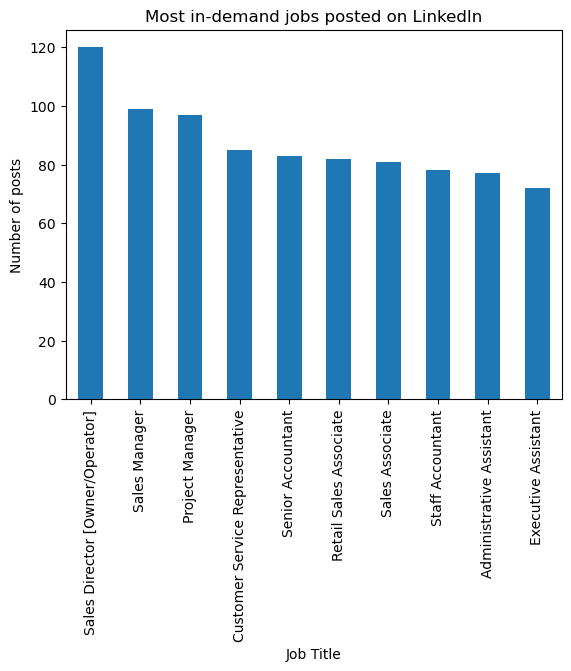

In [9]:
#Plot a bar plot of the top 10 job titles posted on LinkedIn
fig = result_df.groupby('title')['title'].count().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Job Title')
plt.ylabel('Number of posts')
plt.title("Most in-demand jobs posted on LinkedIn")


In [12]:
#this cell groups by location and returns the mean salary for each location

average_values = df.groupby('location')['med_salary'].mean().reset_index()

result_df = df.groupby('location')['med_salary'].agg(['mean', 'count']).reset_index()

result_df.columns = ['Location', 'Mean', 'Salary Count']

In [13]:
#this cell sorts by the avg med salary and adds a column that keeps track of how many jobs offer that avg salary

average_values_sorted = average_values.sort_values(by='med_salary', ascending=False)

result_df_sorted = result_df.sort_values(by='Mean', ascending=False)

# Assuming result_df_sorted is the DataFrame you want to modify
result_df_filtered = result_df_sorted.loc[result_df_sorted['Salary Count'] > 1]

# Display the sorted result
print(average_values_sorted)

# Display the modified DataFrame
print(result_df_filtered)

                    location  med_salary
4106            Thompson, CT    785358.0
2665        Midwest City, OK    440000.0
1516             Garland, TX    400000.0
3643  San Francisco Bay Area    366673.0
3171            Palm Bay, FL    300000.0
...                      ...         ...
4615             Zachary, LA         NaN
4616          Zanesville, OH         NaN
4618            Zellwood, FL         NaN
4619          Zionsville, IN         NaN
4620              Zwolle, LA         NaN

[4621 rows x 2 columns]
                     Location           Mean  Salary Count
3643   San Francisco Bay Area  366673.000000             3
3171             Palm Bay, FL  300000.000000             2
3583           Round Rock, TX  200398.380000             3
3273         Phoenixville, PA  150591.000000             2
2927  New York, United States  144438.769231            13
...                       ...            ...           ...
1675    Greater Yuma, AZ Area      13.850000             2
2459       

Text(0.5, 1.0, 'Location of top mean salaries posted on LinkedIn')

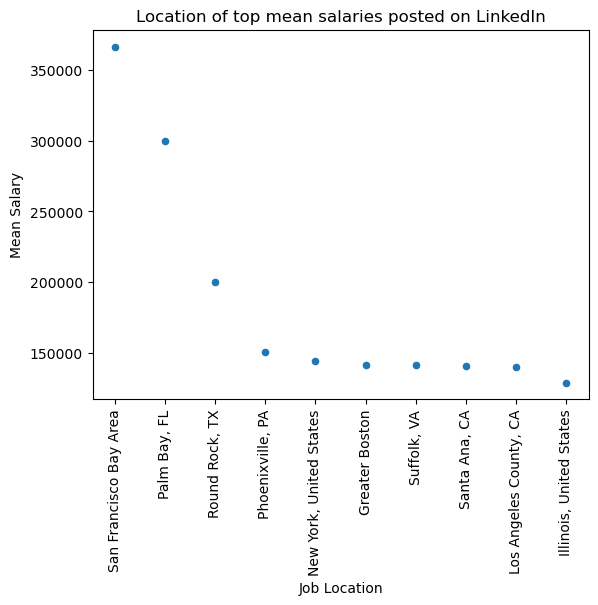

In [14]:
# Plot a scatter plot of the locations with the 10 highest mean salary
result_df_filtered.head(10).plot.scatter(x='Location', y='Mean')
plt.xticks(rotation=90)
plt.xlabel("Job Location")
plt.ylabel("Mean Salary")
plt.title("Location of top mean salaries posted on LinkedIn")

In [ ]:
result_df.columns